- Task: Predict the California Housing Prices based on various relevant quantiles such as a population of the district and median income level.
- Data: California census data (<i>e.g.,</i> population, median income, and median housing price for each block group in California)
- This example is excerpted from the text book 'Hands-on Machine Learining with Scikit-Learn, Keras & Tensor Flow' page 35-84. 

# 1. Data loading
***

In [1]:
# Download California census data
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.info()
housing["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

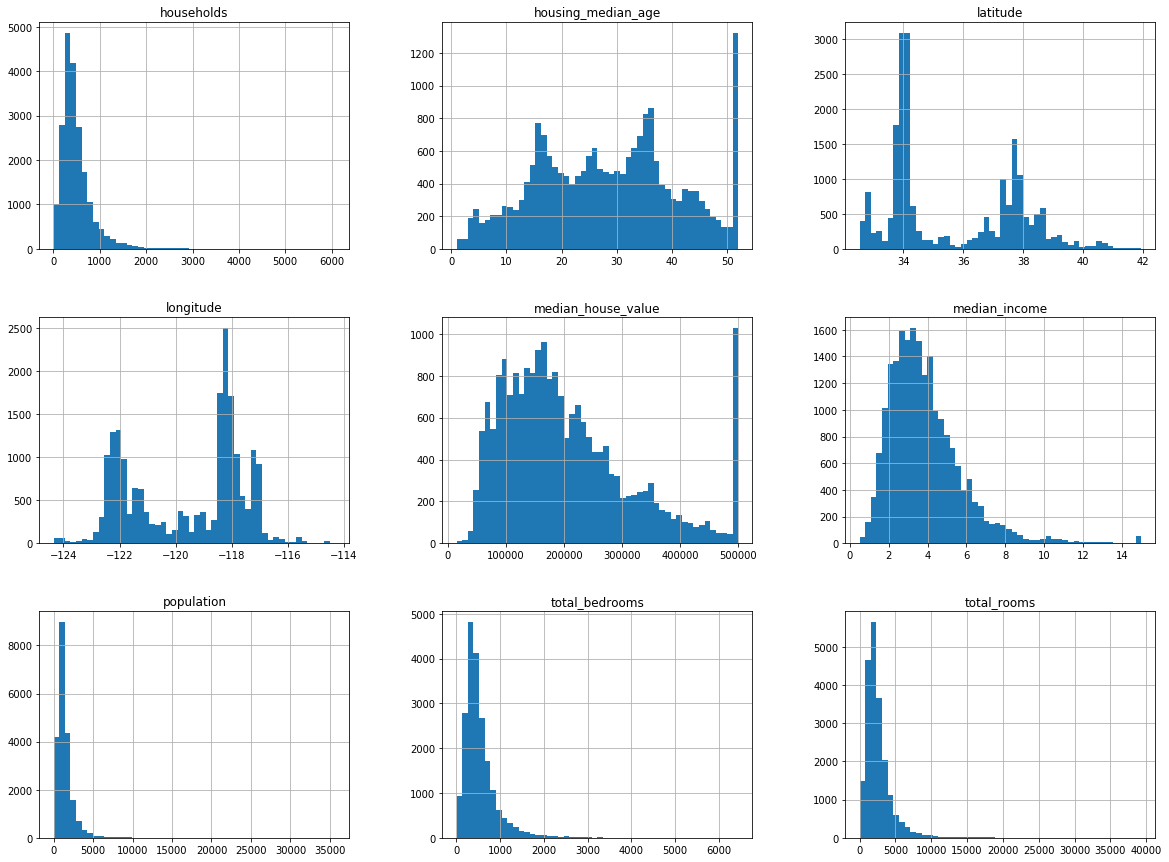

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# 2. Prepare training-test data
***
- Designating which dataset is for training or for test is an important issue.
- If you have sufficiently large datasets, you could simply take randomly one dataset for training and the other for testing. 
- If not, you need a more efficient way to utilize existing datasets while being objectively able to measure the prediction accuracy $\rightarrow$ <b>K-fold cross validation</b>

- 5-folds cross-validation example
<br><img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-3.png'>  

<br><img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-4.png'>  

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

- <i>Stratifed sampling</i>: A way to divide the data into homogeneous subgroups in terms of label, called <i>stata</i>. 
- Using this strategy, the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.

### Example
- Let's say, it turns out that the median income is a very important attribute to predict median housing prices. So you want to evenly distribute this feature across split folds (=Stratified sampling)

<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-5.png'>  

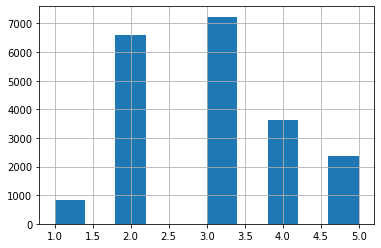

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [15]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3-1. Visualize the data to gain insights
***
- Geographical data

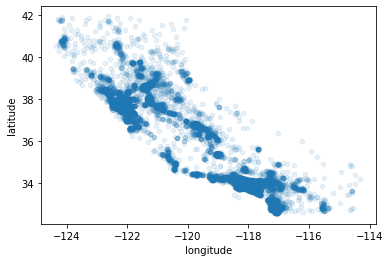

In [18]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

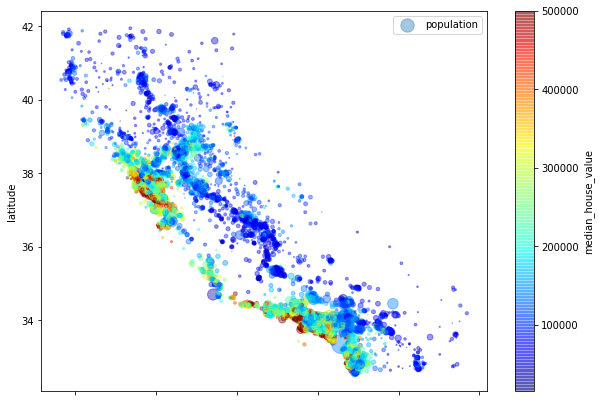

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

- It shows that the hosuing prices are related to the location (<i>e.g.,</i> close to the ocean) and to the population density.

# 3-2. Looking for Correlations
***
- Correlation between every pair of attributes

In [20]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

SyntaxError: invalid syntax (<ipython-input-20-a8cbf19c2f53>, line 1)

<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-6.png'>

## Multiscale Generalized Correlation (MGC)
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-7.png'>
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-8.jpg'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad808b8710>,
      dtype=object)

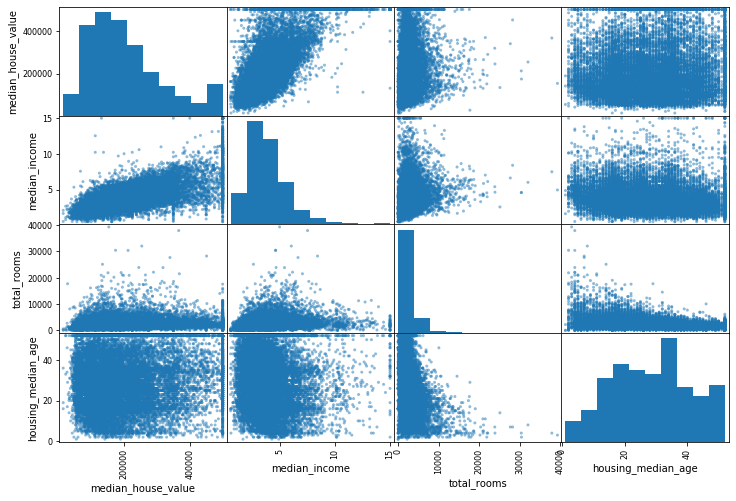

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

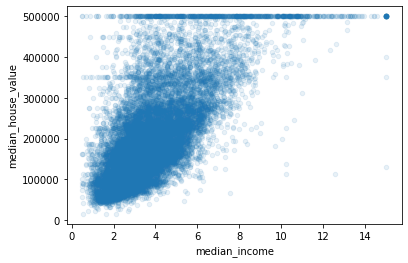

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

# 3-3. Experimenting with Attribute Combinations
***
- Try out various attribute combinations to make them more useful for prediction (manual pattern learning)
    - Total number of rooms (or population) in a district (x)
    - The number of rooms (or family member) per household (o)

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# 4. Revisited: Prepare data (clean and impute).
***
- When there are missing data:
    - Option 1: Remove the cases that have missing value.
    - Option 2: Get rid of entire variables that contain missing value.
    - Option 3: Set the missing value to some value (<i>e.g.,</i> zero, median, mean)
- You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()

In [25]:
# We separate first predictor and responder in this experiment.
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# option 1: housing.dropna(subset=["total_bedrooms"])
# option 2: housing.drop("total_bedrooms", axis=1)
# option 3: 
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

## 4-1. How to impute the missing values
***
- Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [27]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [28]:
# The components such as 'SimpleImputer' are called Estimators in Sklearn (imputer.fit)
# However, if the estimator plays a role of tranforming the data into the new form, the estimator can be also considered as a Transformer.
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

## 4-2. How to handle text and categorical attributes
***
- ocean_proximity attribute: text and categorical variable

In [29]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat = housing[["ocean_proximity"]]

In [30]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [31]:
ordinal_encoder.categories_

# The problem of ordinal coding for totally categorical variable:
# Wrong interpretation for relativeness of ordinal codes
# Solution: Dummy coding or One-hot coding

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## 4-3. Custom Transformer
***
- SimpleImputer was the first Transformer we have learned in this lecture. There are many more useful Transformers in sklearn. 
- However, there are often occasions that you need to write your own Transformer for the tasks such as custom cleanup operations or combining specific attributes.
- All you need to build your own is creating a class and implementing three methods:
    - fit(), transform(), fit_transform()
- Let's make a small Transformer class that adds the combined attributes we discussed earlier.

In [33]:
# Example of Custom Transformer
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## 4-4. Feature Scaling
***
- Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.
- Our housing price prediction is the case (<i>e.g.</i> total # of rooms: 6-39320 vs. median income: 0-15). 
- Two common ways to get all attributes to have the same scale: min-max scaling and standardization.
    - <ins> Min-max scaling (=normalization)</ins>: Values are shifted and rescaled so that they end up ranging from 0 to 1. <br><br>
<center>${X}_{normalized}=\dfrac{X-{X}_{min}}{{X}_{max}-{X}_{min}}$</center><br>
    - Scikit-Learn provides a transformer called 'MinMaxScaler'.
    - It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.
    <br><br>
    - <ins> Standardization</ins>: it makes the mean always zero, and devides by the standard deviation so that the resulting distribution has unit variance.<br><br>
<center>${X}_{standardized}=\dfrac{X-{X}_{mean}}{{X}_{STD}}$</center><br>
    - Unlike min-max scaling, standardization does not bound values to a specific range. However, standardization is much less affected by outliers.
    - Scikit-Learn provides a transformer called StandardScaler for standardization.

## 4-5.  Transformation Pipelines
***
- So far we went through multiple data preparation steps (<i>i.e.,</i> imputation, combining attributes, feature scaling), which may be efficient if being able to run them all sequentially at once (in the right order).
- Scikit-Learn provides the Pipeline class to help with such sequences of transformations.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

- We also tried to properly handle the categorical variables.    
- Could we process both numerical and categorical variables at once?  
    - Yes! In version 0.20, Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news is that it works great with pandas DataFrames.

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns a dense matrix. 
# When there is such a mix of sparse and dense matrices, the Colum nTransformer estimates the density of the final matrix (i.e., the ratio of nonzero cells)
# And it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). 
# In this example, it returns a dense matrix.

# 5. Select and Train a Model
***
- We did everything to prepare and clean before running an actual prediction model. 
- The final question: "What kind of supervising models should we choose to predict a housing price?"

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [38]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [39]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# most districts’ median_hous ing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying.

68628.19819848922

<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-9.png'>

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# This is a typical result when you use a decision tree and use exactly same training data for test. 
# The way the decision tree create all the branches and nodes is to maximally fit into the given data.
# Thus, without any constraint, the tree-based algorithm usually over-fit to the training data. 

0.0

# 6. Better Evaluation Using Cross-Validation
- One way to relieve this problem is to use the train_test_split() function
    - Split the training set into a smaller training set and a validation set, 
    - Then train your models against the smaller training set and evaluate them against the validation set.
<br><img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-4.png'>  

- Sklearn has a function for this purpose (k-fold cross-validation feature)

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [43]:
display_scores(tree_rmse_scores)

Scores: [68827.75466267 66053.38753345 70346.37426289 69865.52669429
 71604.55036598 74053.71660399 72368.16209297 70667.35544036
 74579.53213021 70693.64298756]
Mean: 70906.0002774382
Standard deviation: 2353.5847670177027


In [44]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983443


- What about Random Forest? 
- RF has a randomized component (feature-wise) in the algorithm to make its performance more generalizable, not to overfit into the specific combination of parameter setting. 

In [45]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

import joblib
joblib.dump(forest_reg, "RF_model_result.pkl")

# Slightly better results! 
# However, are the hyper-parameters optimized for the best prediction accuracy?

Scores: [49465.44953215 47792.29035323 49940.87325147 52270.26808541
 49591.49825784 53773.18817493 48812.04211833 47941.82674068
 52886.39897726 50099.7121748 ]
Mean: 50257.35476660913
Standard deviation: 1950.5745262540004


['RF_model_result.pkl']

In [46]:
forest_reg_loaded = joblib.load("RF_model_result.pkl")

# 7. Fine-Tune Your Model
***
- How can we search for optimal parameters? Here are basic two methods for this purpose.
    - Grid Search: Use cross-validation to evaluate all the possible combinations of hyperparameter values.
    - Randomized Search: When the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. 
        - This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.
    - Emsemble Methods: 
<br><img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week3/Fig3-10.png'>    

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

# The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, 
# And it will train each model 5 times (since we are using fivefold cross validation).

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [48]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [49]:
cvres = grid_search.cv_results_

In [50]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63605.8977728346 {'max_features': 2, 'n_estimators': 3}
55141.44630914553 {'max_features': 2, 'n_estimators': 10}
53040.70063340562 {'max_features': 2, 'n_estimators': 30}
61413.75769914631 {'max_features': 4, 'n_estimators': 3}
52887.60278808614 {'max_features': 4, 'n_estimators': 10}
50690.532817931366 {'max_features': 4, 'n_estimators': 30}
58844.53815690794 {'max_features': 6, 'n_estimators': 3}
52390.101131007876 {'max_features': 6, 'n_estimators': 10}
49994.482832817535 {'max_features': 6, 'n_estimators': 30}
57988.46155874953 {'max_features': 8, 'n_estimators': 3}
52127.52070764257 {'max_features': 8, 'n_estimators': 10}
50100.32222020681 {'max_features': 8, 'n_estimators': 30}
62530.979569293064 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54390.772864690916 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60490.57697164361 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52988.849088566414 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [51]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [52]:
feature_importances

array([8.09669910e-02, 6.27638047e-02, 4.24812430e-02, 1.97022080e-02,
       1.72914388e-02, 1.90456020e-02, 1.61310985e-02, 3.35005851e-01,
       6.05901081e-02, 1.06223763e-01, 6.61618658e-02, 1.45172627e-02,
       1.45541089e-01, 9.88117453e-05, 4.49090689e-03, 8.98795513e-03])

In [53]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

full_pipeline.named_transformers_

# from sklearn.compose import ColumnTransformer

# num_attribs = list(housing_num)
# cat_attribs = ["ocean_proximity"]

# full_pipeline = ColumnTransformer([
#        ("num", num_pipeline, num_attribs),
#        ("cat", OneHotEncoder(), cat_attribs),
#    ])

# housing_prepared = full_pipeline.fit_transform(housing)

{'num': Pipeline(memory=None,
          steps=[('imputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='median',
                                verbose=0)),
                 ('attribs_adder',
                  CombinedAttributesAdder(add_bedrooms_per_room=True)),
                 ('std_scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True))],
          verbose=False),
 'cat': OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='error', sparse=True)}

In [54]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [55]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [56]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [57]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3350058511727406, 'median_income'),
 (0.1455410892124223, 'INLAND'),
 (0.1062237630981456, 'pop_per_hhold'),
 (0.08096699102839884, 'longitude'),
 (0.06616186577877238, 'bedrooms_per_room'),
 (0.06276380470127133, 'latitude'),
 (0.06059010811338406, 'rooms_per_hhold'),
 (0.0424812430494804, 'housing_median_age'),
 (0.019702208042123717, 'total_rooms'),
 (0.019045601996846132, 'population'),
 (0.017291438783032975, 'total_bedrooms'),
 (0.01613109852799273, 'households'),
 (0.014517262734734289, '<1H OCEAN'),
 (0.008987955128376104, 'NEAR OCEAN'),
 (0.004490906887017845, 'NEAR BAY'),
 (9.881174526066835e-05, 'ISLAND')]

In [58]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

47930.21241479111